In [1]:

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import itertools
import random
import pickle

EPOCH = 200
KERNEL_SIZE = 3
POOLING_SIZE = 2
BATCH_SIZE = 128

DATA_PATH = "./pickle_mat/"

def list_to_list(input_list):
    input_list_to_list = list(itertools.chain(*input_list))
    return input_list_to_list

In [2]:
record_list = []
pickle_input = dict()
normal_X, supra_X, ventri_X, fusion_X, unclass_X = [], [], [], [], []
normal_y, supra_y, ventri_y, fusion_y, unclass_y = [], [], [], [], []

print("[INFO] Read records file from ", DATA_PATH)
with open(DATA_PATH + 'RECORDS') as f:
    record_lines = f.readlines()

for i in range(len(record_lines)):
    record_list.append(str(record_lines[i].strip()))

for j in tqdm(range(len(record_list))):
    temp_path = DATA_PATH + "mitPssigP_" + record_list[j] + ".pkl"
    with open(temp_path, 'rb') as f:
        pickle_input = pickle.load(f)

        for i in range(len(pickle_input[1])):
            check_ann = pickle_input[1][i]
            temp_ann_list = list()
            if check_ann == "N":            # Normal
                temp_ann_list.append(0)
                normal_X.append(pickle_input[0][i])
                normal_y.append(temp_ann_list)

            elif check_ann == "S":          # Supra-ventricular
                temp_ann_list.append(1)
                supra_X.append(pickle_input[0][i])
                supra_y.append(temp_ann_list)

            elif check_ann == "V":          # Ventricular
                temp_ann_list.append(2)
                ventri_X.append(pickle_input[0][i])
                ventri_y.append(temp_ann_list)

            elif check_ann == "F":          # False alarm
                temp_ann_list.append(3)
                fusion_X.append(pickle_input[0][i])
                fusion_y.append(temp_ann_list)

            else:                           # Unclassed 
                temp_ann_list.append(4)
                unclass_X.append(pickle_input[0][i])
                unclass_y.append(temp_ann_list)

[INFO] Read records file from  ./pickle_mat/


100%|██████████| 48/48 [00:01<00:00, 38.15it/s]


In [3]:
# 데이터 갯수 파악
# N, S, V, F, Q
uni, cnt = np.unique(normal_y, return_counts=True)
print(uni, cnt)
print("-" * 13)

uni, cnt = np.unique(supra_y, return_counts=True)
print(uni, cnt)
print("-" * 13)

uni, cnt = np.unique(ventri_y, return_counts=True)
print(uni, cnt)
print("-" * 13)

uni, cnt = np.unique(fusion_y, return_counts=True)
print(uni, cnt)
print("-" * 13)

uni, cnt = np.unique(unclass_y, return_counts=True)
print(uni, cnt)
print("-" * 13)

[0] [90592]
-------------
[1] [2781]
-------------
[2] [7234]
-------------
[3] [802]
-------------
[4] [8039]
-------------


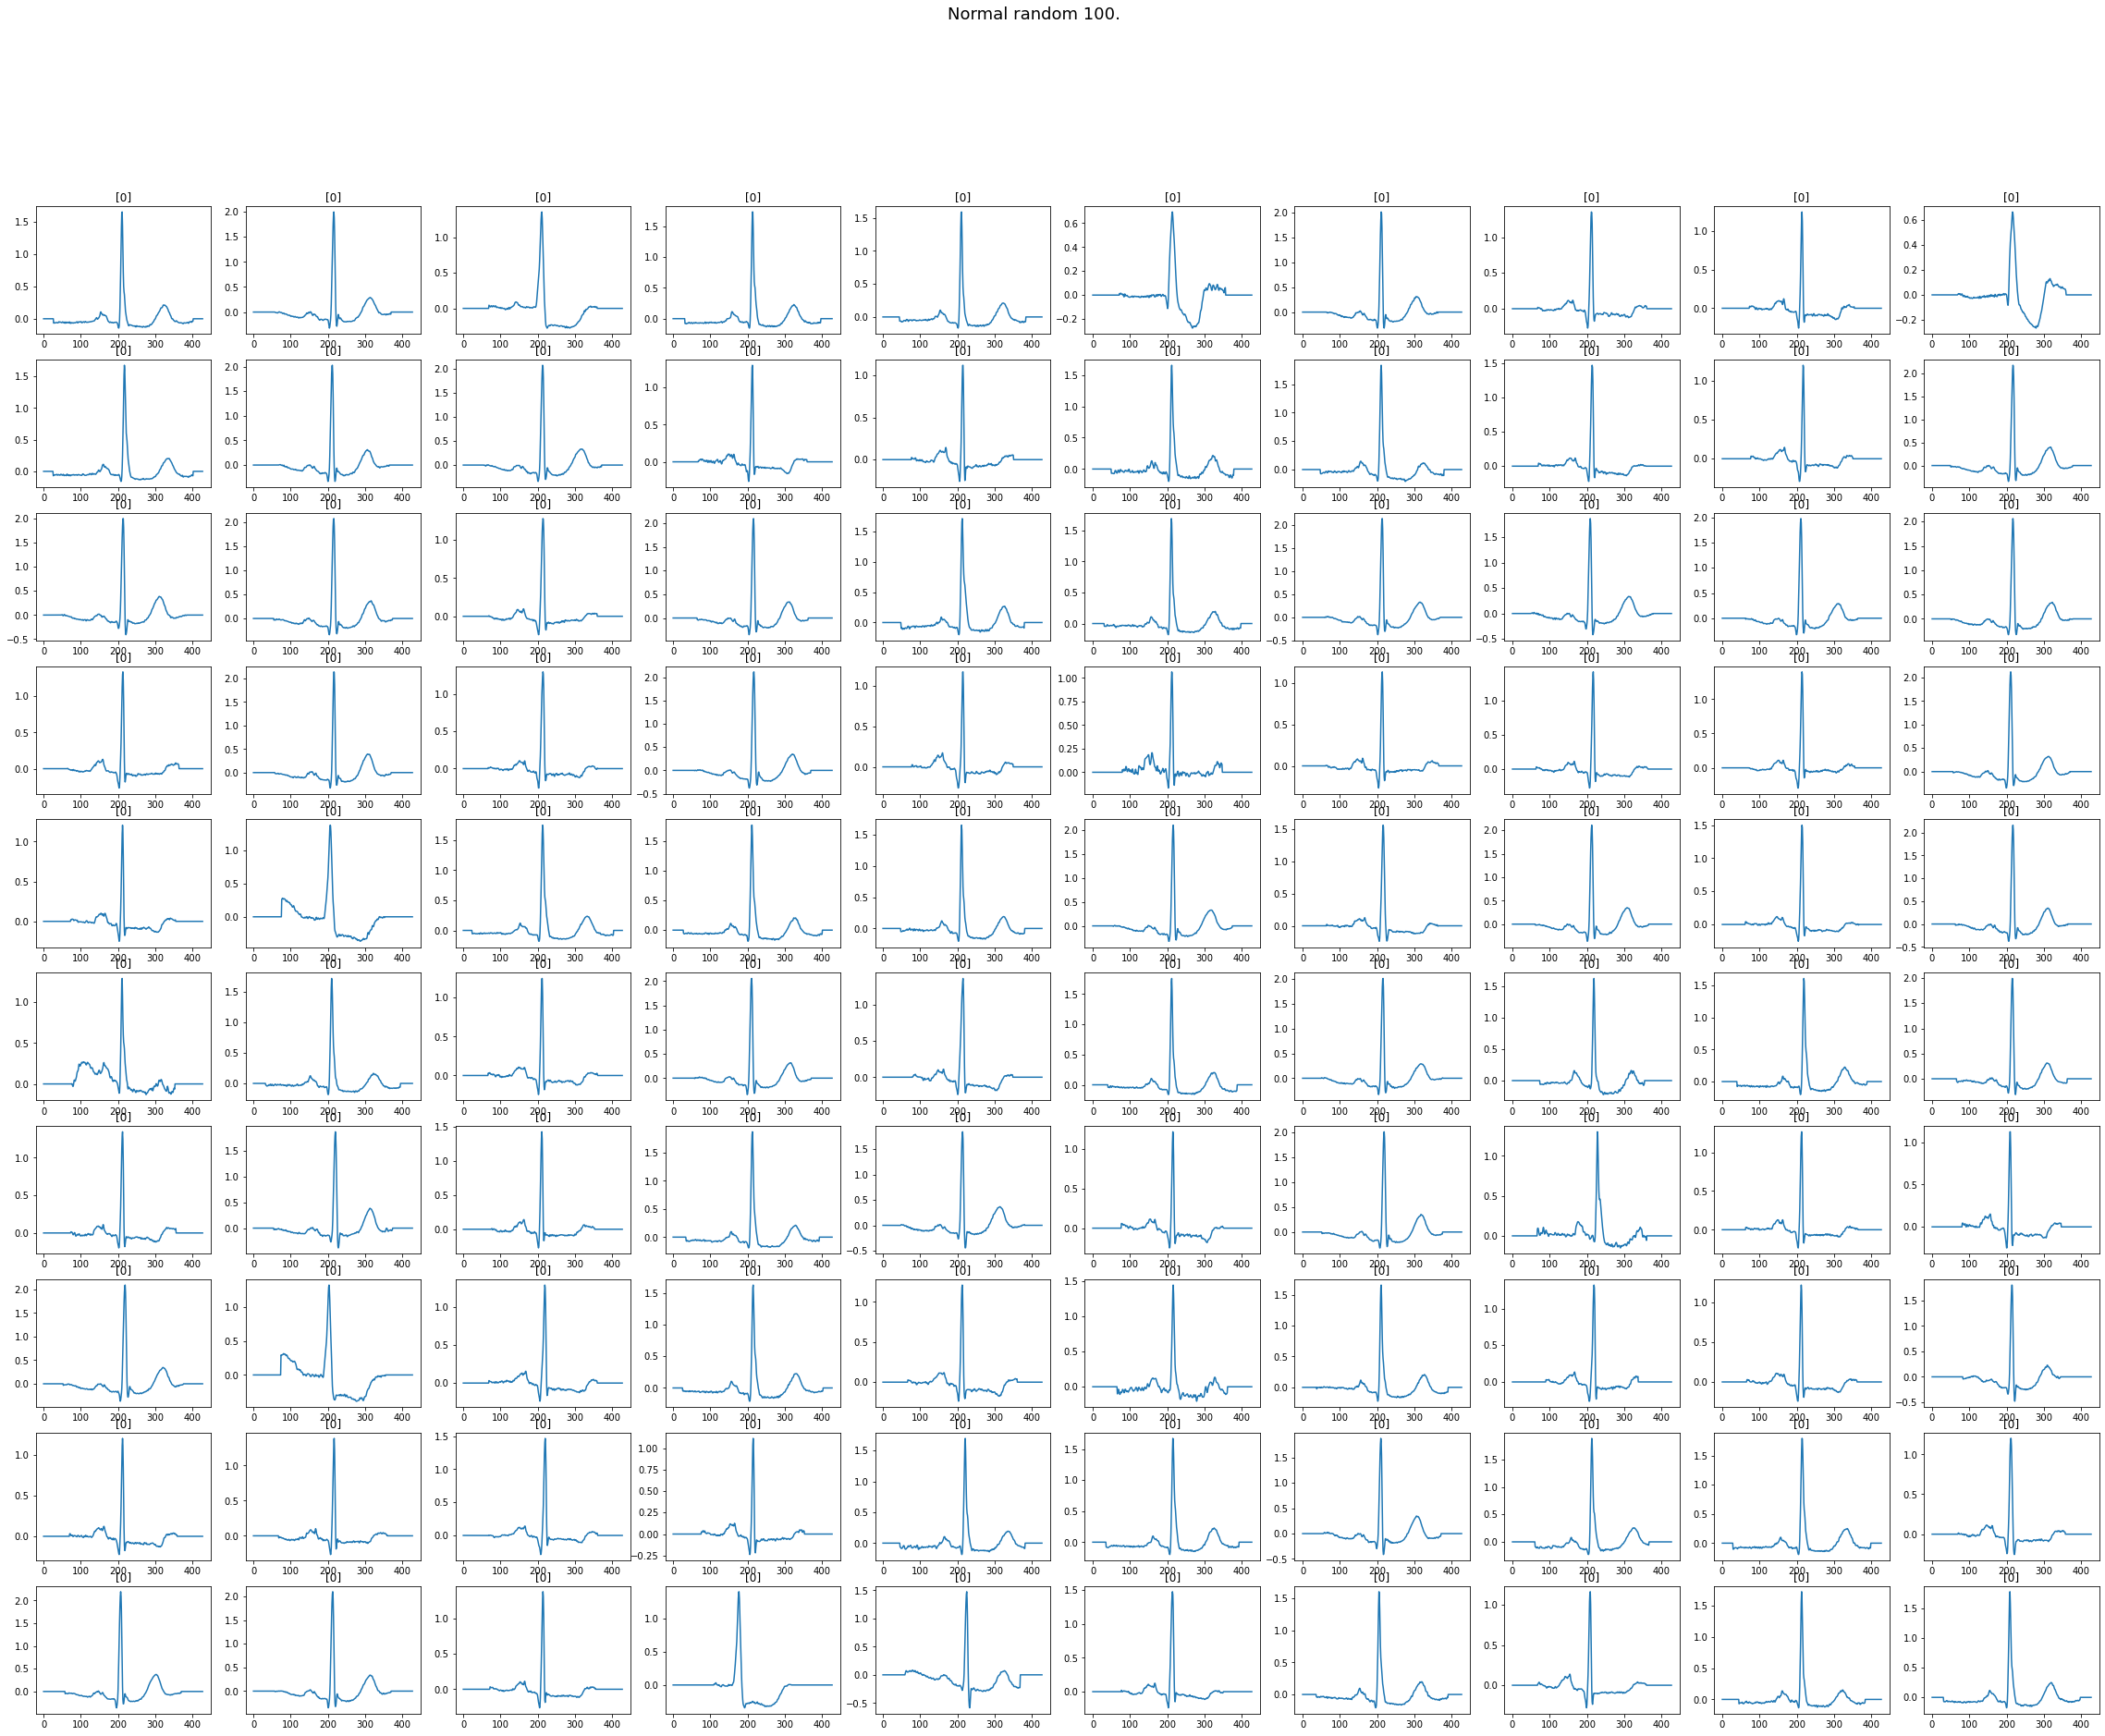

In [4]:
plt.figure(figsize=(40, 30))
plt.suptitle("Normal random 100.", fontsize=18)
n = 0
random.seed(11)

for i in random.sample(range(6480), 100):
    ax = plt.subplot(10, 10, n+1)
    plt.plot(normal_X[i])
    ax.set_title(str(normal_y[i]))
    n+=1

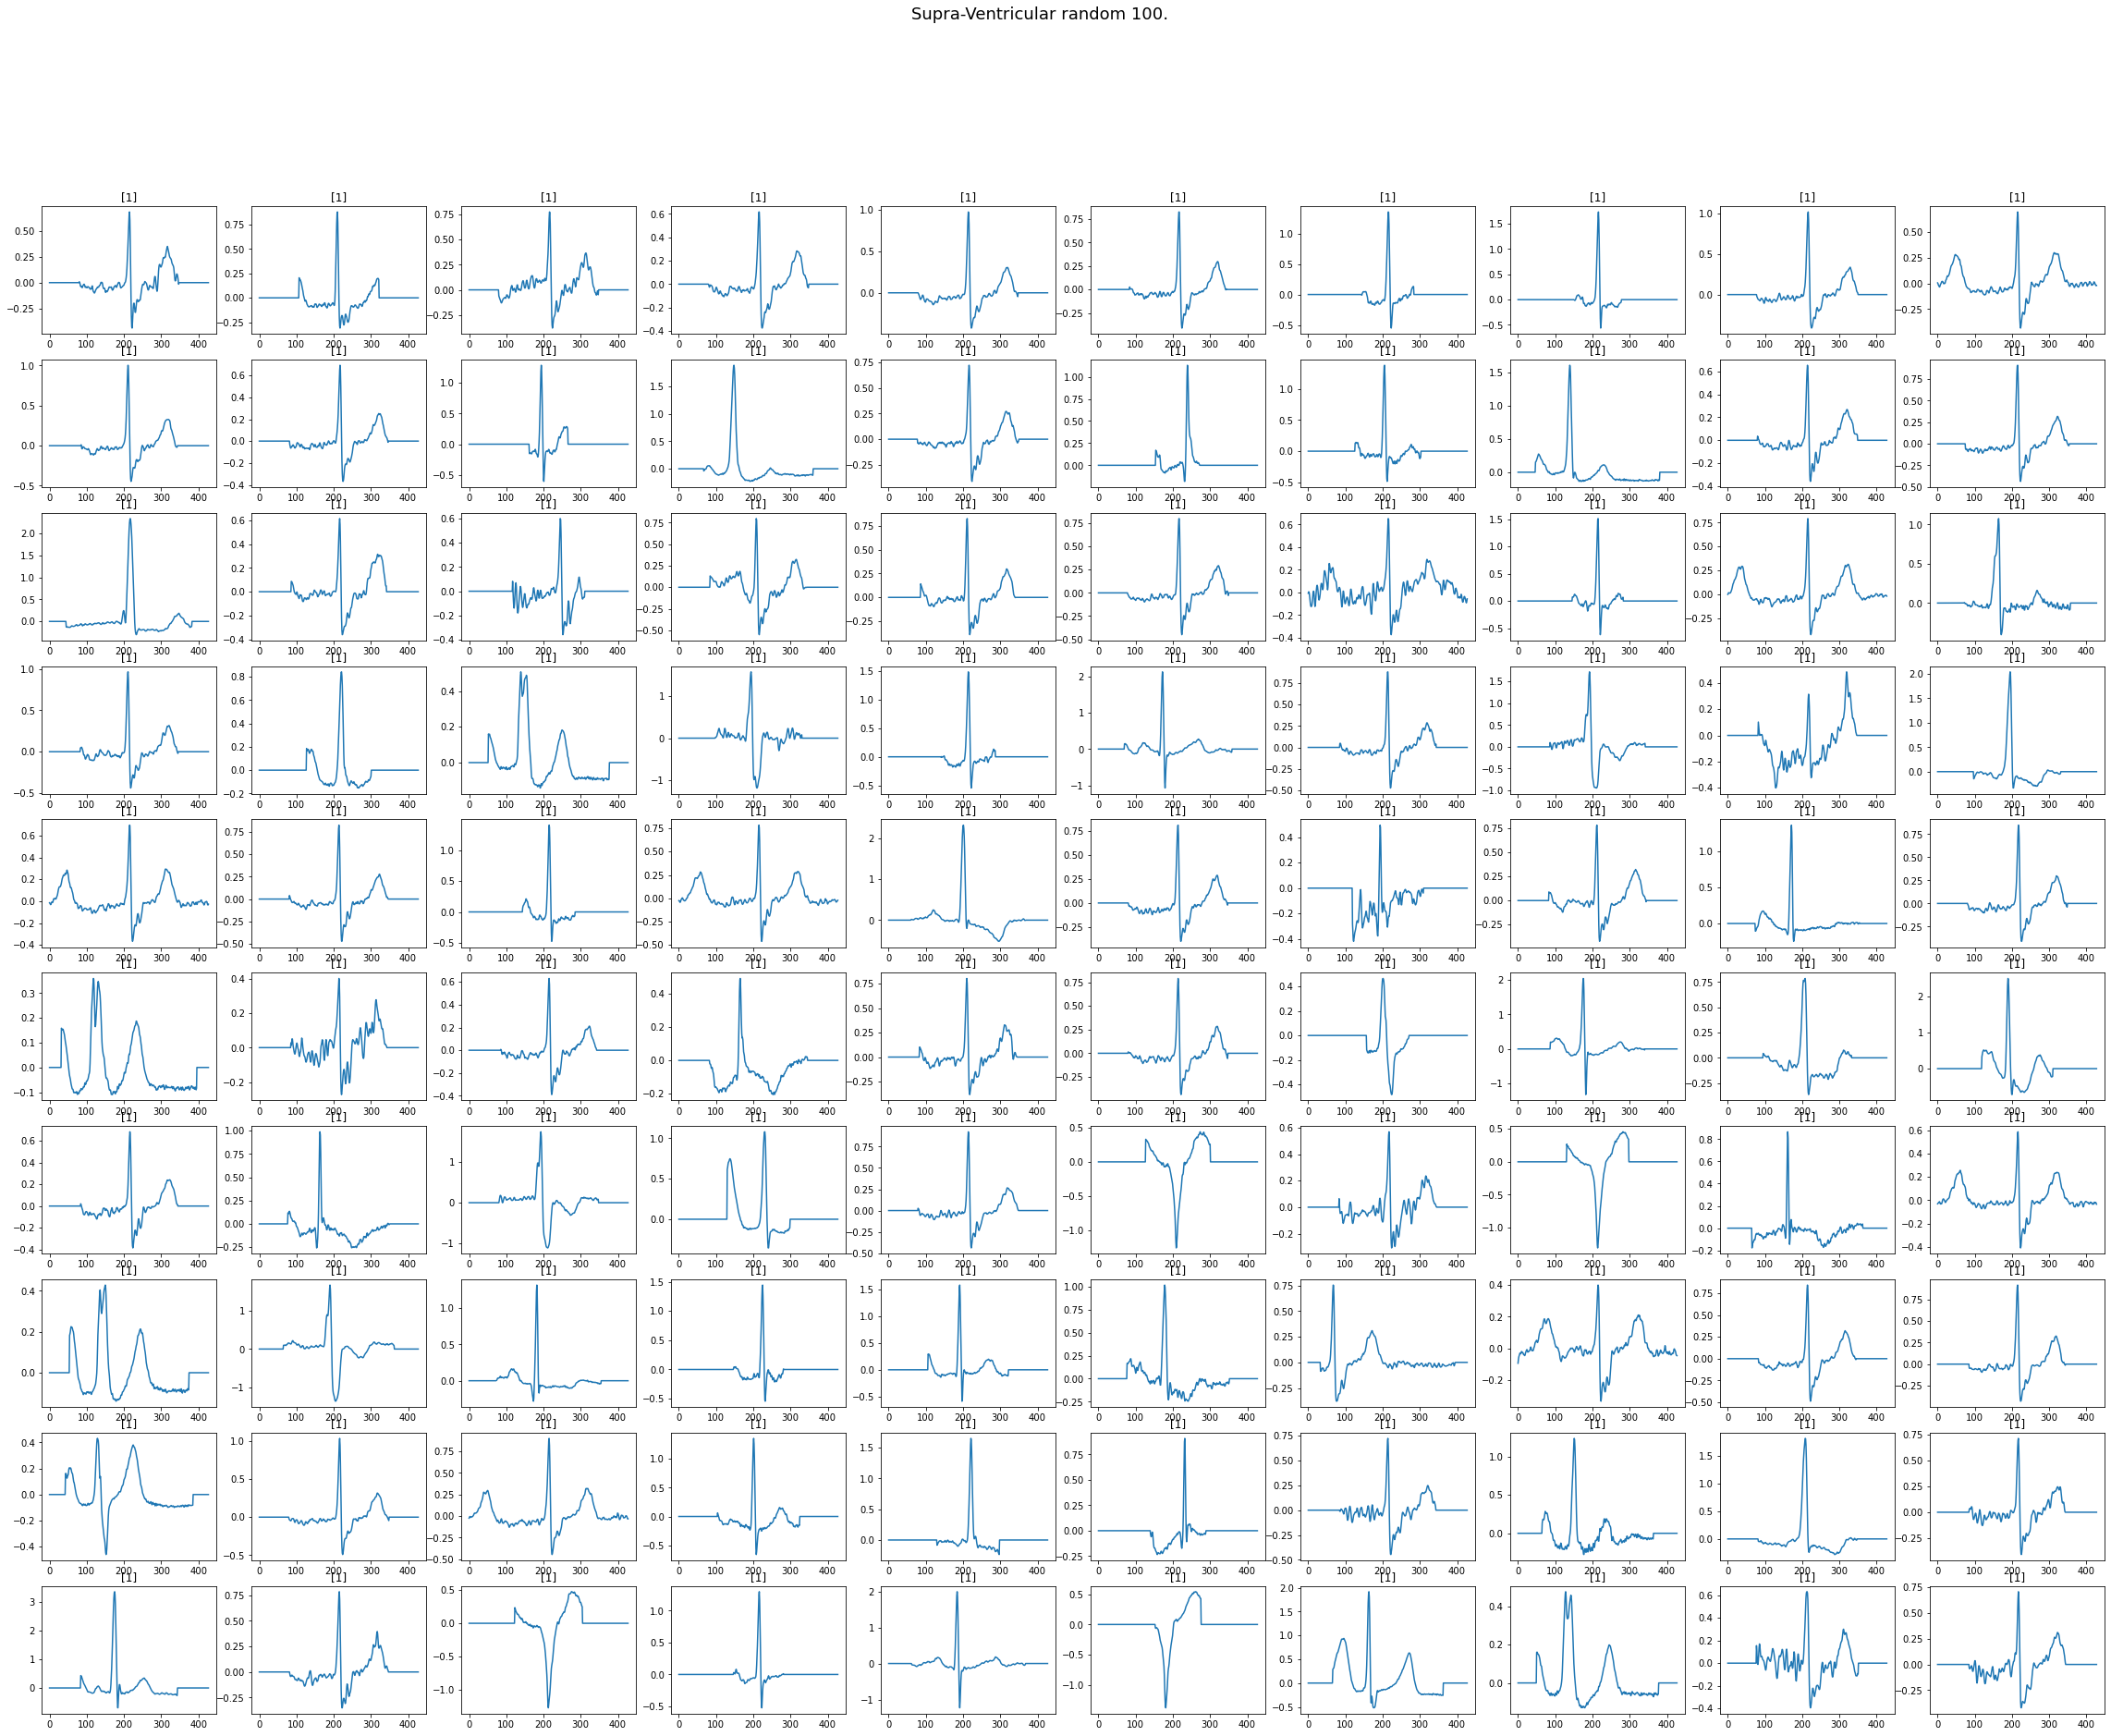

In [5]:
plt.figure(figsize=(40, 30))
plt.suptitle("Supra-Ventricular random 100.", fontsize=18)
n = 0
random.seed(11)

for i in random.sample(range(2781), 100):
    ax = plt.subplot(10, 10, n+1)
    plt.plot(supra_X[i])
    ax.set_title(str(supra_y[i]))
    n+=1

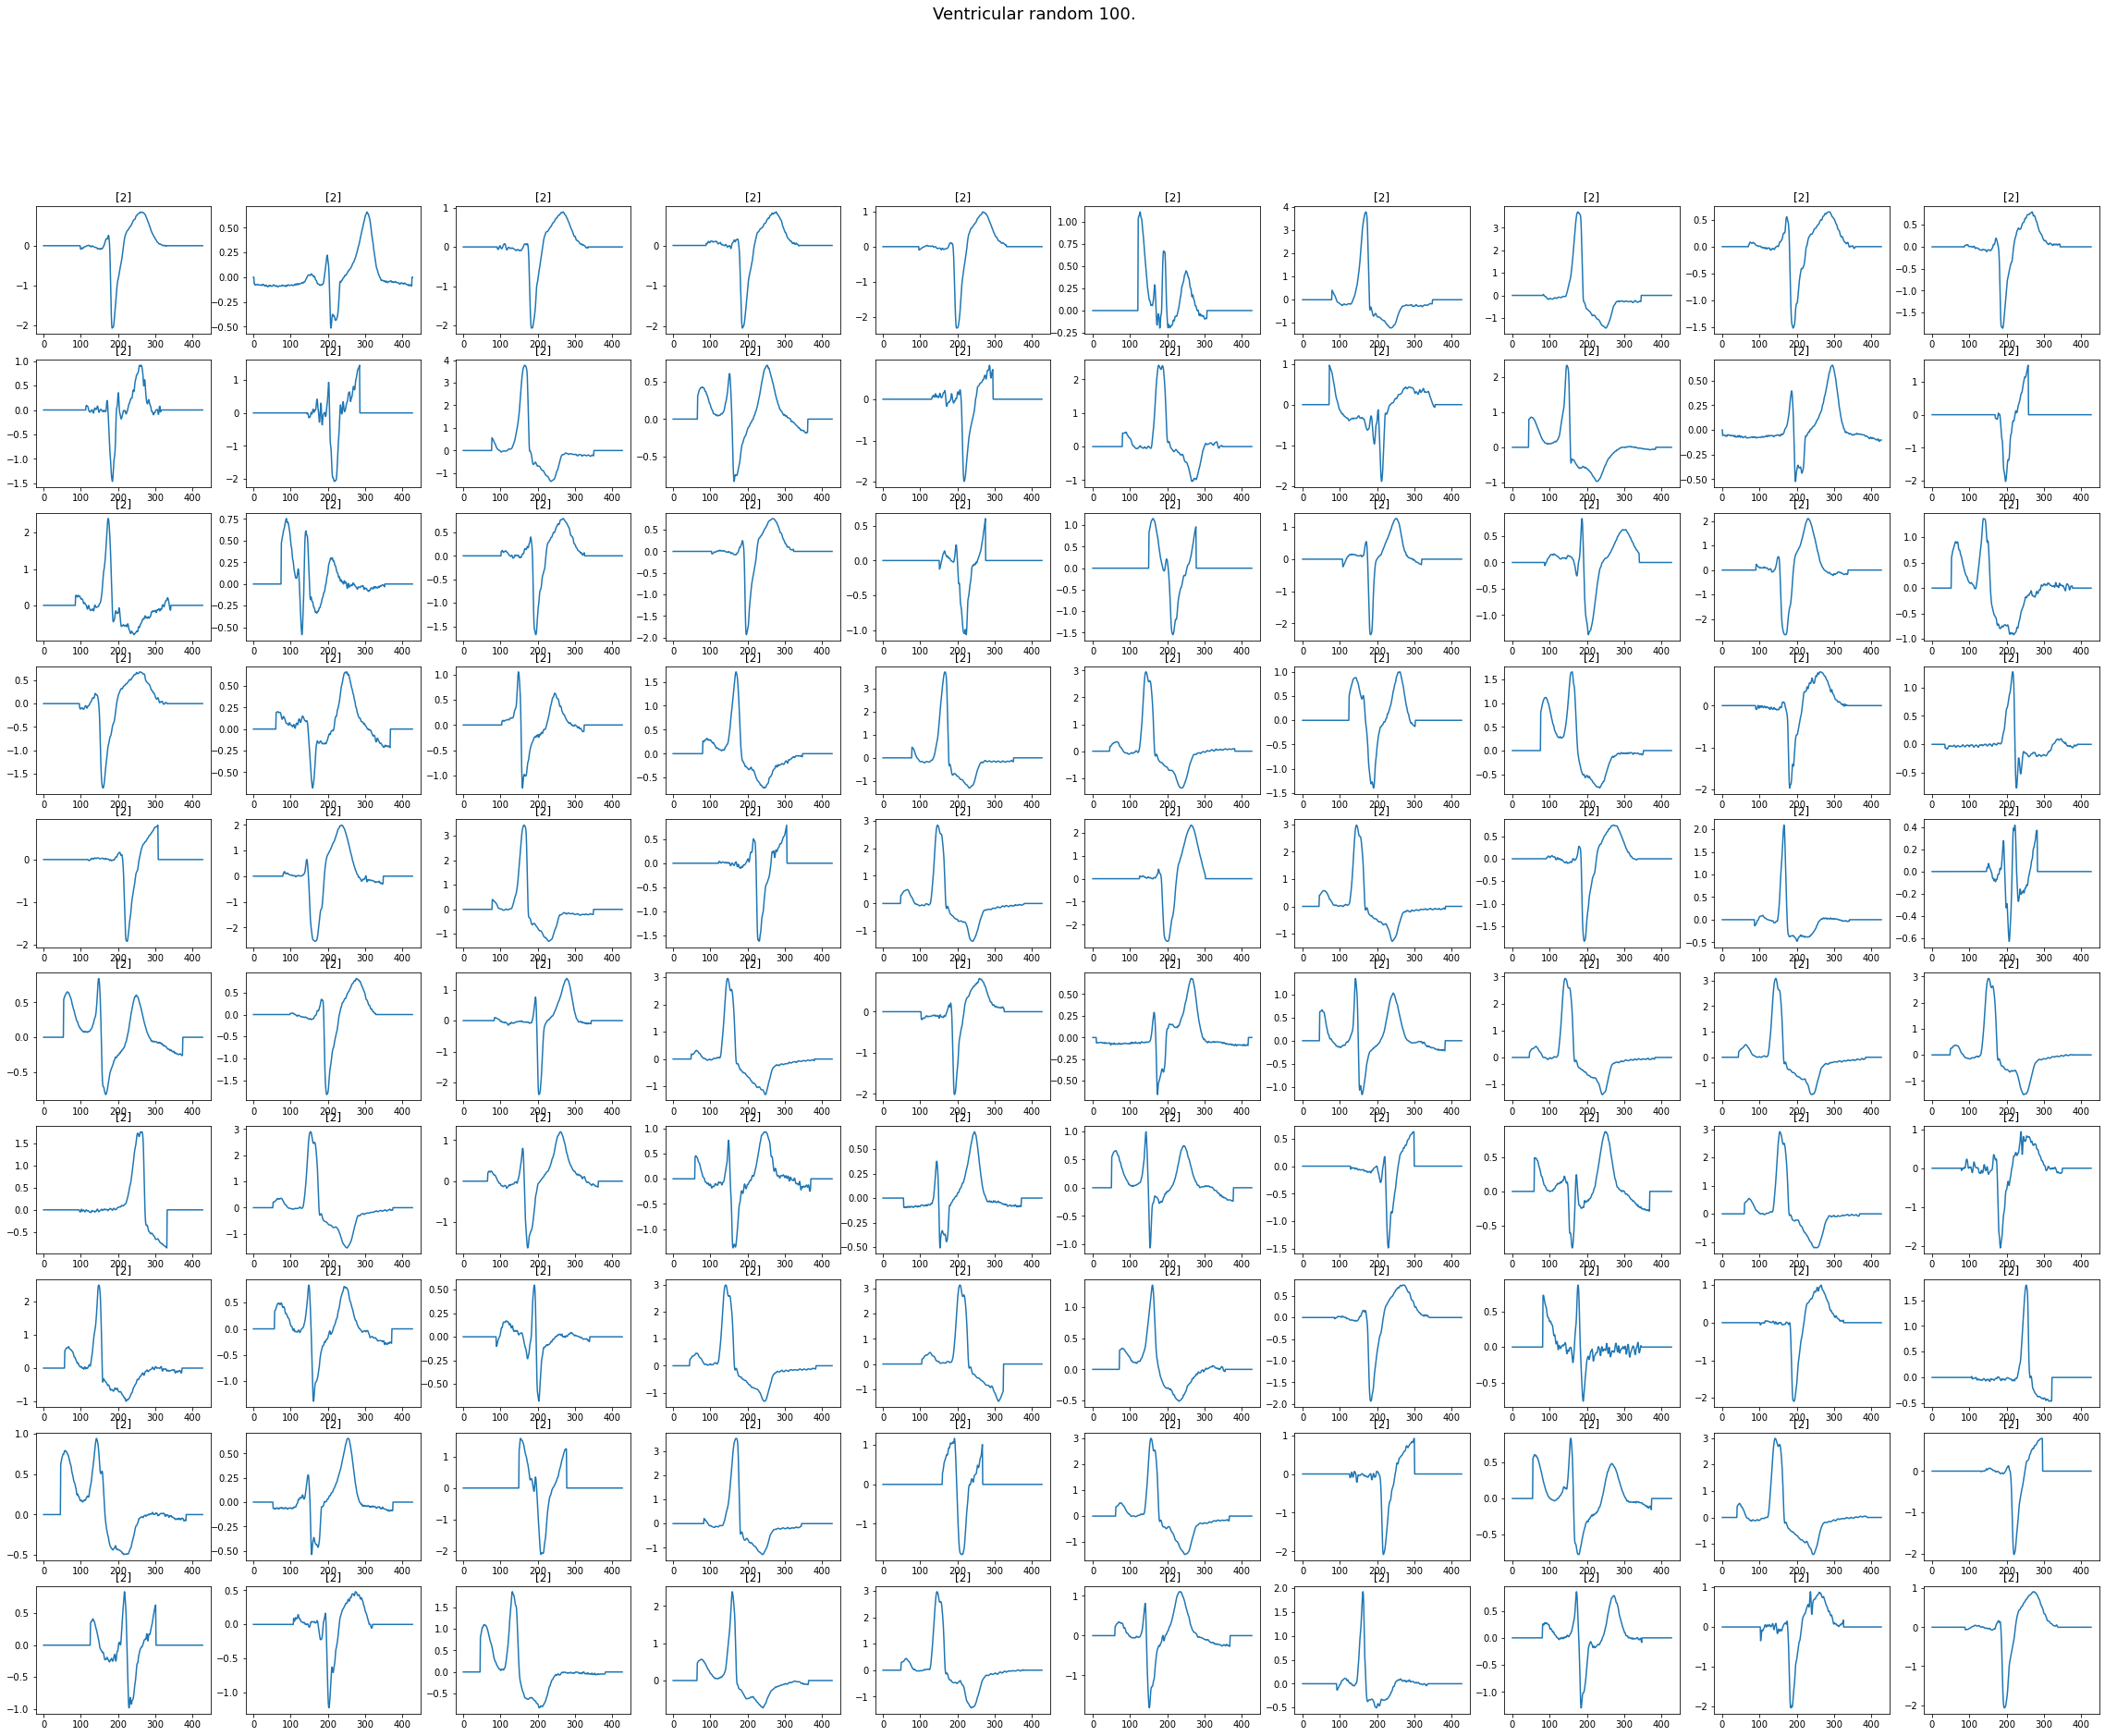

In [6]:
plt.figure(figsize=(40, 30))
plt.suptitle("Ventricular random 100.", fontsize=18)
n = 0
random.seed(11)

for i in random.sample(range(2781), 100):
    ax = plt.subplot(10, 10, n+1)
    plt.plot(ventri_X[i])
    ax.set_title(str(ventri_y[i]))
    n+=1

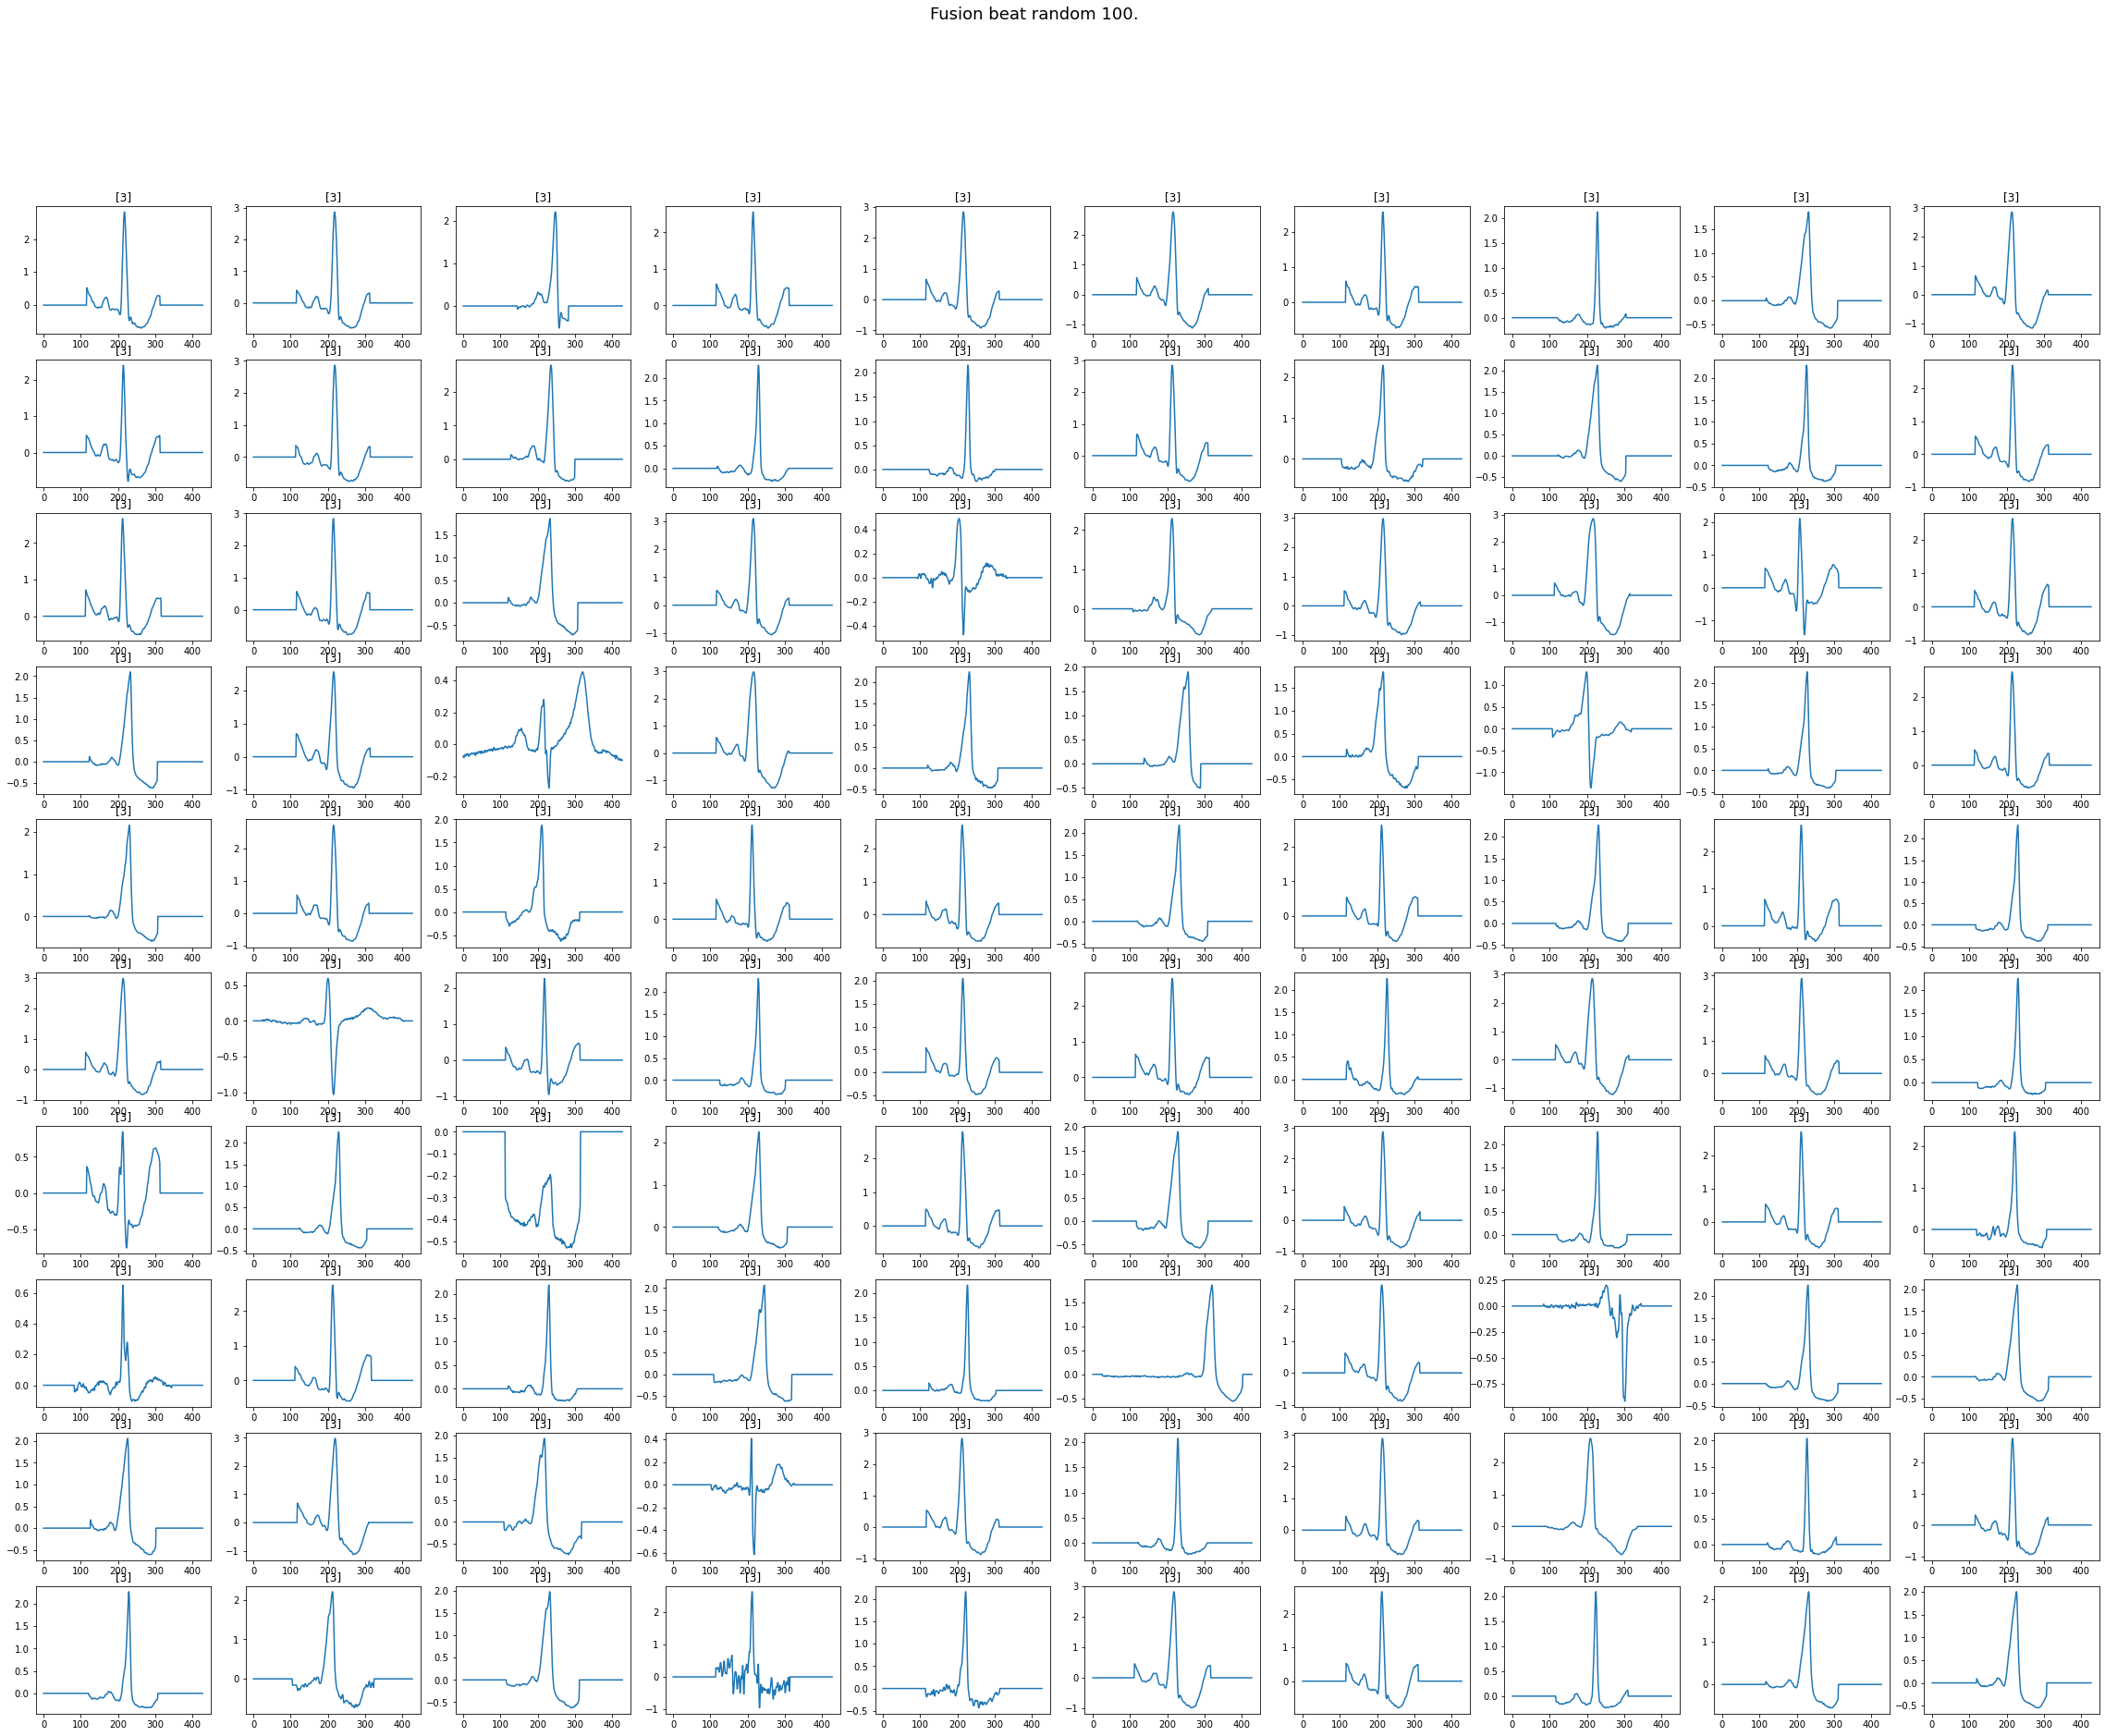

In [7]:
plt.figure(figsize=(40, 30))
plt.suptitle("Fusion beat random 100.", fontsize=18)
n = 0
random.seed(11)

for i in random.sample(range(802), 100):
    ax = plt.subplot(10, 10, n+1)
    plt.plot(fusion_X[i])
    ax.set_title(str(fusion_y[i]))
    n+=1

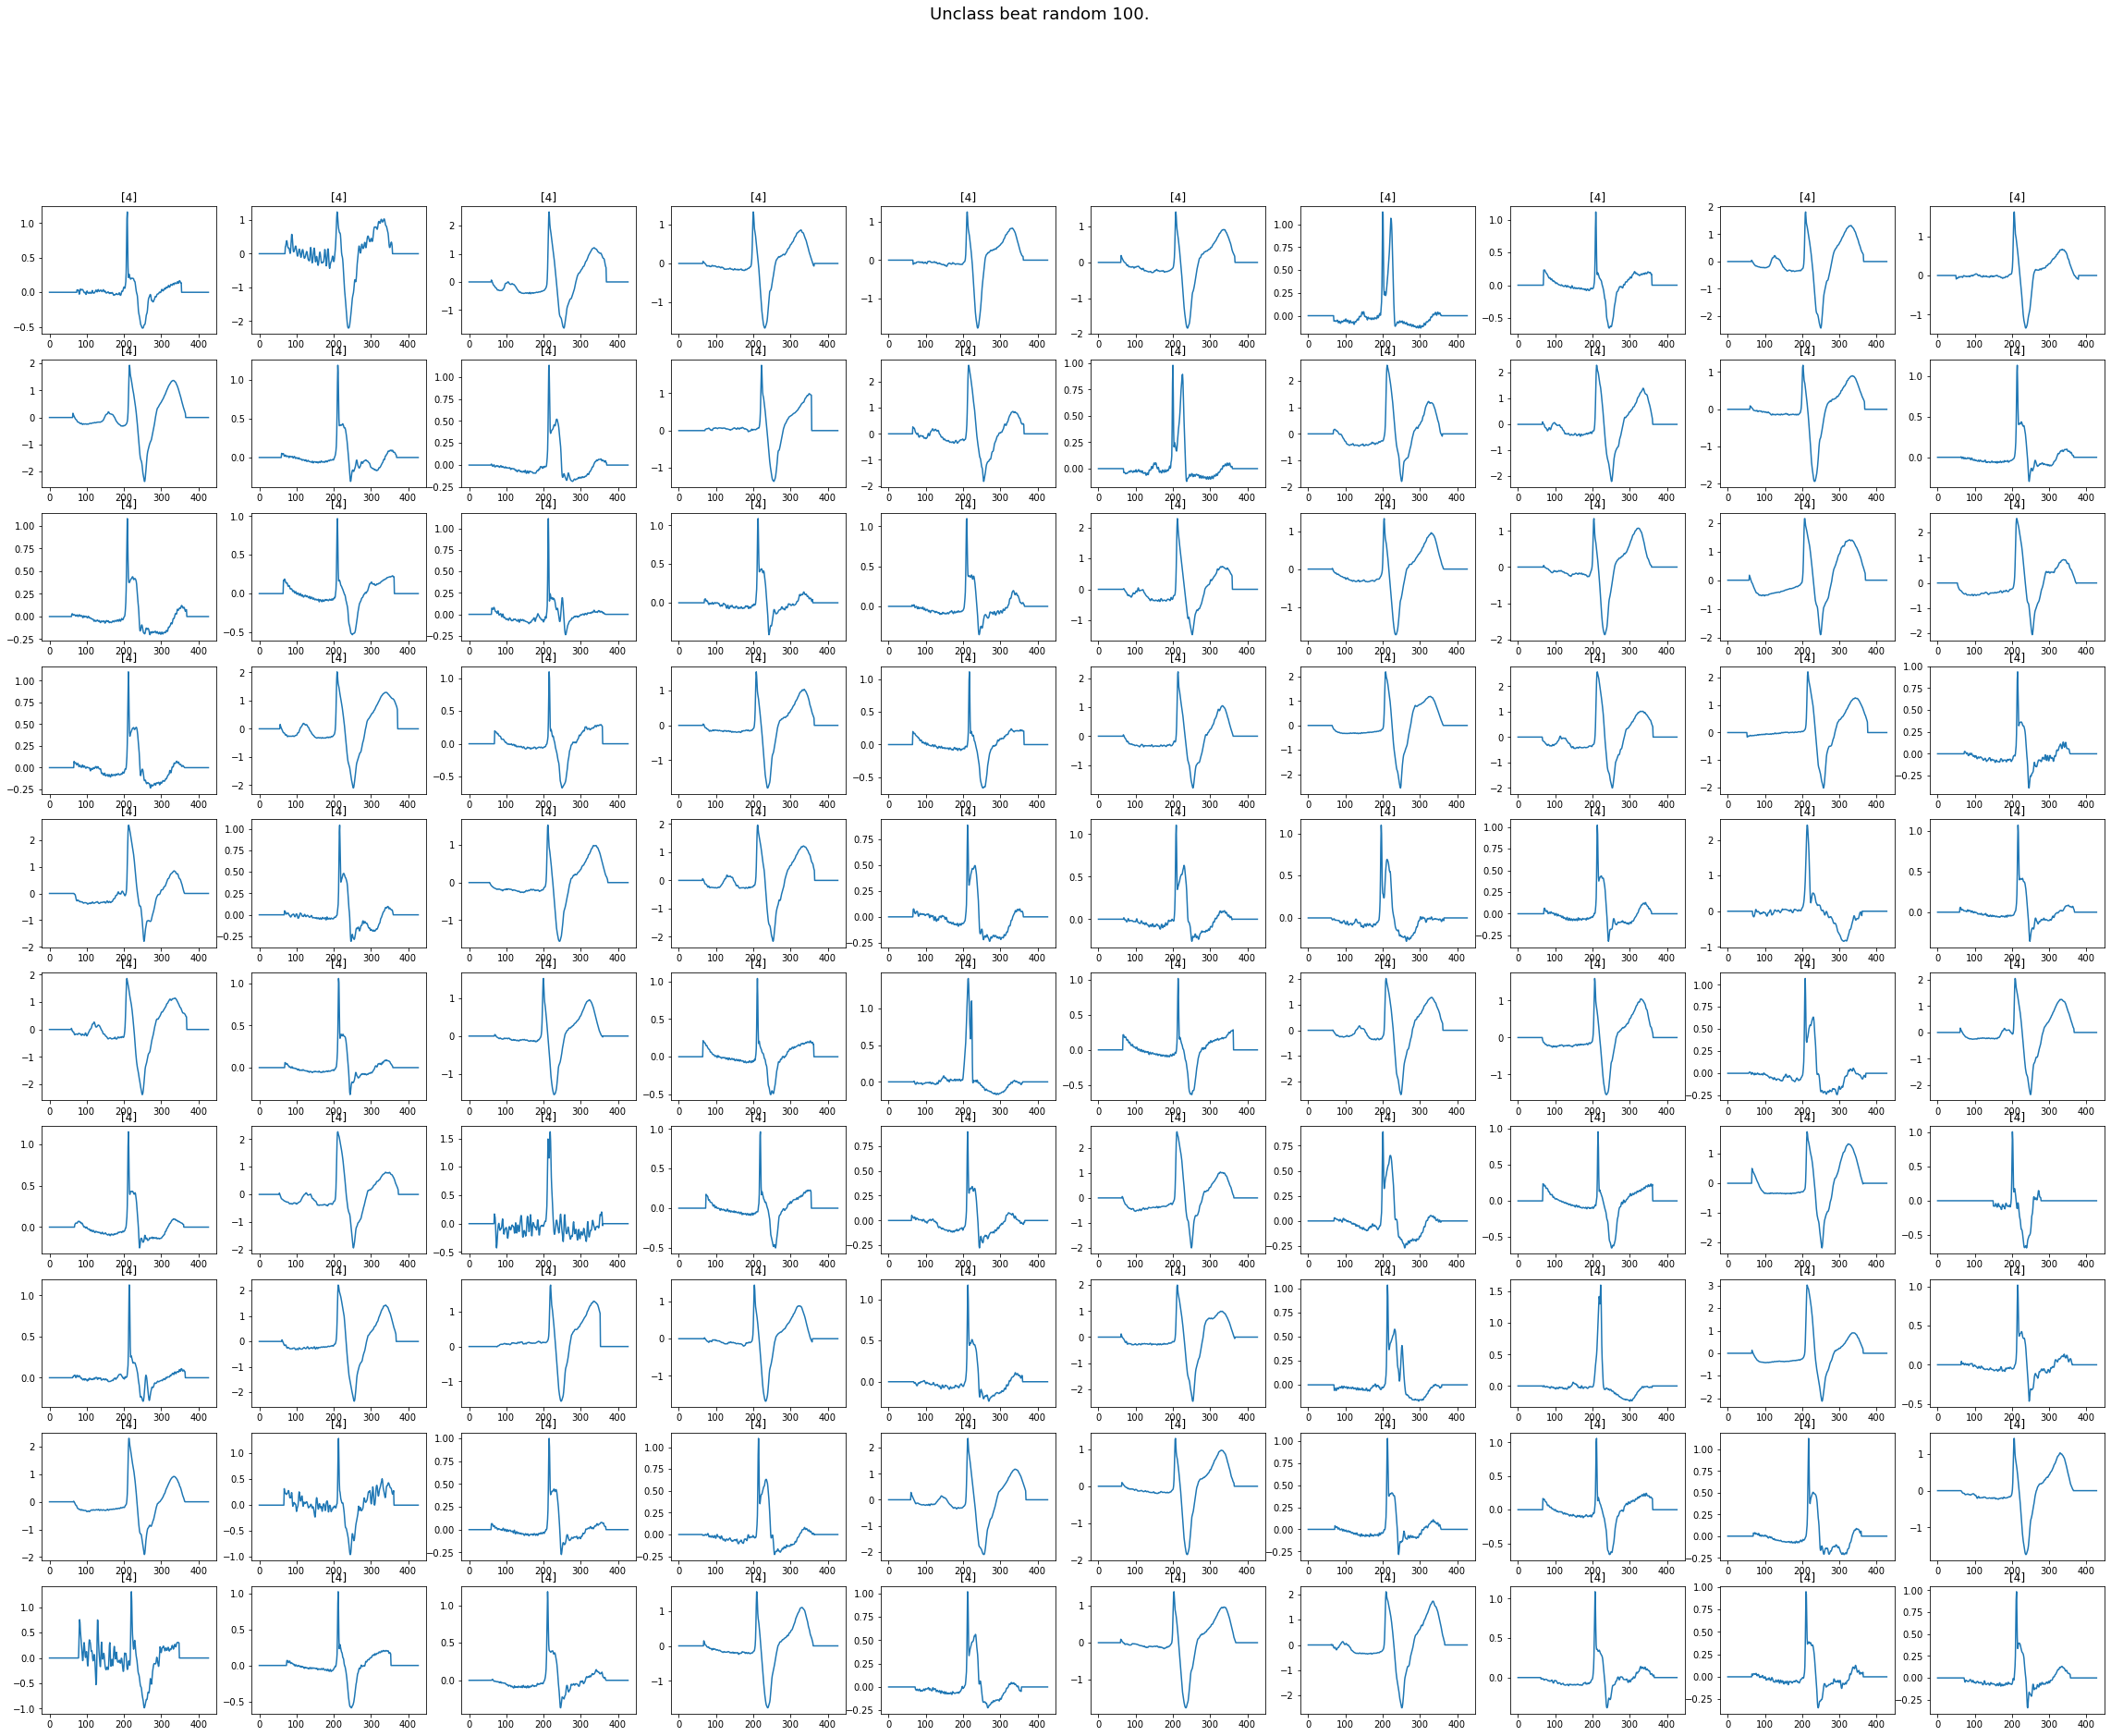

In [8]:
plt.figure(figsize=(40, 30))
plt.suptitle("Unclass beat random 100.", fontsize=18)
n = 0
random.seed(11)

for i in random.sample(range(8039), 100):
    ax = plt.subplot(10, 10, n+1)
    plt.plot(unclass_X[i])
    ax.set_title(str(unclass_y[i]))
    n+=1